In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper

## Normal Distribution Chart

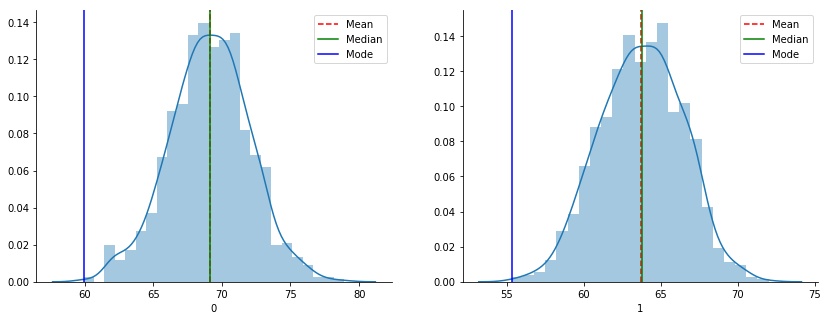

In [3]:
random_distribution1 = np.random.normal(69.1,2.9,(1000,1))
random_distribution2 = np.random.normal(63.7,2.7,(1000,1))
random_distributions = np.hstack((random_distribution1,random_distribution2))

dist_df = pd.DataFrame(random_distributions)

helper.distplot_w_stats(dist_df)

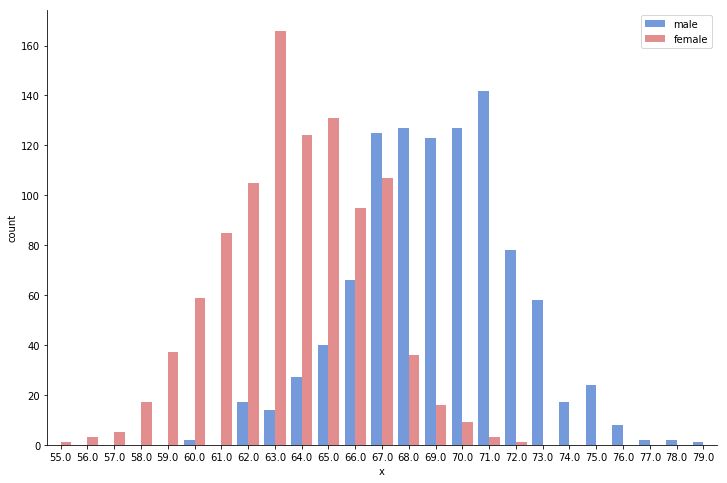

In [46]:
tem_df1 = dist_df[0].to_frame(name='x')
tem_df2 = dist_df[1].to_frame(name='x')

tem_df1['hue'] = 'male'
tem_df2['hue'] = 'female'

tem_df = pd.concat([tem_df1,tem_df2], axis=0)
# cut into 40 bins,
# select the mid of the interval
# round to 2 digits
tem_df['x'] = pd.cut(tem_df['x'],100).apply(lambda x: round(x.mid,0))

# plot
pal = dict(male="#6495ED", female="#F08080")

plt.subplots(figsize=(12,8))
sns.countplot(x='x',hue='hue',data=tem_df,palette=pal)
plt.legend(loc=1)

sns.despine()

## Quantile and its inverse

In [43]:
dist_df.describe()

,0,1
count,1000.000000,1000.000000
mean,69.111420,63.734869
std,2.903791,2.685784
min,59.934842,55.309648
25%,67.191952,61.860614
50%,69.115828,63.754128
75%,71.014586,65.623260
max,78.921817,71.995975


The list above shows the information of quantiles of the data. The 50% quantile of the data is the median.

We know that quantile is a function to divide the data into equally split groups. To prove each quantile contains the same amount of the data, let's test the quantile function in pandas:

In [45]:
for quantile in [67.191952, 69.115828, 71.014586]:
    count = (dist_df[0] < quantile).sum()
    print(count)

250
500
750


**To know the top 2.2% of people's height.**

Solution: pandas.DataFrame.quantile

In [62]:
# To get top 2.2% of people's height
x = dist_df[0].quantile(.978)
print("The top 2.2% of people's height is {}".format(x))

The top 2.2% of people's height is 74.95986100184189


**Knowing the height of someone, figure out his/her percentile in the population.**

Solution: Scipy.stats.percentileofscore

In [73]:
from scipy import stats
import pandas as pd
import numpy as np

#quantile function
y = .30 # change this to test the result
x = dist_df.quantile(y)[0]
print("Knowing the quantile (y={}),\nusing the pandas quantile function we know the {}th percentile is: {}".format(y,y*100,x))

print("-"*30)

#inverse of quantile
z = stats.percentileofscore(dist_df[0],x)
print("Knowing the value (x={}),\nusing the scipy percentile function we know the quantile of this value is: {}".format(x,z))

Knowing the quantile (y=0.3),
using the pandas quantile function we know the 30.0th percentile is: 67.6939389226526
------------------------------
Knowing the value (x=67.6939389226526),
using the scipy percentile function we know the quantile of this value is: 30.0
